In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the number of classes in your dataset
num_classes = 2

In [ ]:
# Define the base model
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

171317808/171317808 [==============================] - 6s 0us/step


In [ ]:
# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.794525 to fit



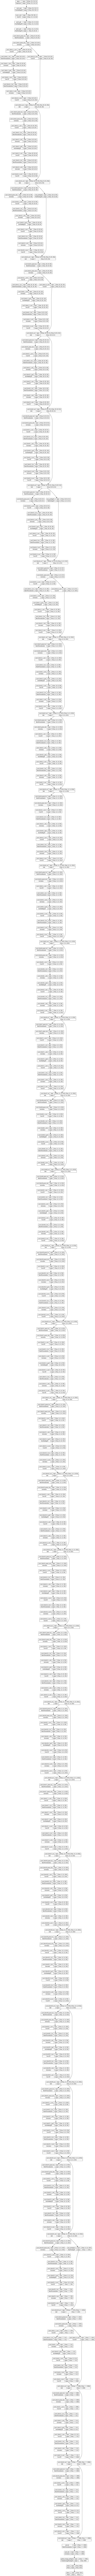

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=5, scale_z=3, max_z=3, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Set the checkpoint file path
checkpoint_filepath = '/content/drive/Shareddrives/MobileNetV2/Xception/best_ResNet101V2_model.h5'

In [ ]:
# Train the model
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples/train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples/val_generator.batch_size)

<ipython-input-11-7d1a1c61692c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
26/26 [==============================] - 932s 34s/step - loss: 0.7593 - accuracy: 0.6226 - val_loss: 401.0202 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 852s 32s/step - loss: 0.5724 - accuracy: 0.6976 - val_loss: 12.2625 - val_accuracy: 0.5056
Epoch 3/10
26/26 [==============================] - 889s 34s/step - loss: 0.4631 - accuracy: 0.7810 - val_loss: 47.1928 - val_accuracy: 0.6667
Epoch 4/10
26/26 [==============================] - 889s 34s/step - loss: 0.4044 - accuracy: 0.8476 - val_loss: 690.9348 - val_accuracy: 0.5000
Epoch 5/10
26/26 [==============================] - 888s 34s/step - loss: 0.3212 - accuracy: 0.8786 - val_loss: 689.0636 - val_accuracy: 0.5167
Epoch 6/10
26/26 [==============================] - 888s 35s/step - loss: 0.2649 - accuracy: 0.9036 - val_loss: 30.0465 - val_accuracy: 0.8000
Epoch 7/10
26/26 [==============================] - 890s 34s/step - loss: 0.2873 - accuracy: 0.9000 - val_loss: 238.5286 - val_accuracy: 0.

In [ ]:
# Train the model
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples/train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples/val_generator.batch_size)

<ipython-input-14-7d1a1c61692c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
26/26 [==============================] - 80s 3s/step - loss: 0.4410 - accuracy: 0.8143 - val_loss: 31.6961 - val_accuracy: 0.2667
Epoch 2/10
26/26 [==============================] - 81s 3s/step - loss: 0.3613 - accuracy: 0.8619 - val_loss: 9.2808 - val_accuracy: 0.1500
Epoch 3/10
26/26 [==============================] - 79s 3s/step - loss: 0.3068 - accuracy: 0.8690 - val_loss: 66.6106 - val_accuracy: 0.6667
Epoch 4/10
26/26 [==============================] - 83s 3s/step - loss: 0.2847 - accuracy: 0.8845 - val_loss: 10.5612 - val_accuracy: 0.7278
Epoch 5/10
26/26 [==============================] - 80s 3s/step - loss: 0.2770 - accuracy: 0.9000 - val_loss: 2.3348 - val_accuracy: 0.6611
Epoch 6/10
26/26 [==============================] - 82s 3s/step - loss: 0.2588 - accuracy: 0.9107 - val_loss: 2.3163 - val_accuracy: 0.7944
Epoch 7/10
26/26 [==============================] - 78s 3s/step - loss: 0.2270 - accuracy: 0.9167 - val_loss: 27.0065 - val_accuracy: 0.7056
Epoch 8/10
26/26

In [ ]:
# Evaluate the model on the test data
score = model.evaluate_generator(test_generator, test_generator.samples/test_generator.batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-12-ce71338dcc72>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, test_generator.samples/test_generator.batch_size)


Test loss: 0.2990525960922241
Test accuracy: 0.9333333373069763


In [ ]:
# Evaluate the model on the validation data
val_score = model.evaluate_generator(val_generator, val_generator.samples/val_generator.batch_size)
print('Validation loss:', val_score[0])
print('Validation accuracy:', val_score[1])

<ipython-input-13-1062bb97ba0c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_score = model.evaluate_generator(val_generator, val_generator.samples/val_generator.batch_size)


Validation loss: 1.566727876663208
Validation accuracy: 0.9166666865348816


In [ ]:
# Save the model
model.save(checkpoint_filepath)

In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

6/6 [==============================] - 7s 921ms/step - loss: 0.2265 - accuracy: 0.9556
Test accuracy: 0.9555555582046509
